<a href="https://colab.research.google.com/github/kayrocsilva/am-fatec-2025-2/blob/main/Aula1303.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importação das Bibliotecas

In [ ]:
!pip install ploty -- upgrade
!pip install squarify -- upgrade

ERROR: Could not find a version that satisfies the requirement ploty (from versions: none)
ERROR: No matching distribution found for ploty
ERROR: Could not find a version that satisfies the requirement upgrade (from versions: none)
ERROR: No matching distribution found for upgrade


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


#Carregamento de Dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_credito = pd.read_csv('/content/drive/MyDrive/am5t2/am5s/credit_data.csv')
base_credito

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [4]:
base_credito.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


# 1a) mostrar primeiras linhas do conjunto

In [ ]:
print(base_credito.head(1))

   clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0


# 1b)Verificar os tipos de variáveis

In [ ]:
print(base_credito.dtypes)

clientid      int64
income      float64
age         float64
loan        float64
default       int64
dtype: object


# 1c) Encontrar valores ausentes

In [ ]:
print(base_credito.isnull().sum())

clientid    0
income      0
age         3
loan        0
default     0
dtype: int64


# 1d) Encontrar valores negativos

In [ ]:
for col in ["income", "age", "loan"]:
    if (base_credito[col] < 0).any():
        print(f"\nAtenção: A coluna '{col}' contém valores negativos!")
        valores_negativos_age = base_credito[base_credito["age"] < 0]
        print(f"Linhas com valores negativos na coluna 'age':\n{valores_negativos_age}")


Atenção: A coluna 'age' contém valores negativos!
Linhas com valores negativos na coluna 'age':
    clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0


# 2)Calcule médias, medianas, desvios padrão e distribuições das principais variáveis numéricas.
Identifique a presença de outliers e distribuições assimétricas.


In [ ]:
numericas = ["income", "age", "loan"]
estatisticas = base_credito[numericas].describe().T

## a)Médias

In [ ]:
estatisticas["media_aritmetica"] = base_credito[numericas].mean()
print(estatisticas)


         count          mean           std          min           25%  \
income  2000.0  45331.600018  14326.327119  20014.48947  32796.459717   
age     1997.0     40.807559     13.624469    -52.42328     28.990415   
loan    2000.0   4444.369695   3045.410024      1.37763   1939.708847   

                 50%           75%           max  media_aritmetica  
income  45789.117313  57791.281668  69995.685578      45331.600018  
age        41.317159     52.587040     63.971796         40.807559  
loan     3974.719419   6432.410625  13766.051239       4444.369695  


## b)medianas

In [ ]:
estatisticas["mediana"] = base_credito[numericas].median()
print(estatisticas)


         count          mean           std          min           25%  \
income  2000.0  45331.600018  14326.327119  20014.48947  32796.459717   
age     1997.0     40.807559     13.624469    -52.42328     28.990415   
loan    2000.0   4444.369695   3045.410024      1.37763   1939.708847   

                 50%           75%           max  media_aritmetica  \
income  45789.117313  57791.281668  69995.685578      45331.600018   
age        41.317159     52.587040     63.971796         40.807559   
loan     3974.719419   6432.410625  13766.051239       4444.369695   

             mediana  
income  45789.117313  
age        41.317159  
loan     3974.719419  


## c) desvio padrão

In [ ]:
estatisticas["desvio_padrao"] = base_credito[numericas].std()
print(estatisticas)


         count          mean           std          min           25%  \
income  2000.0  45331.600018  14326.327119  20014.48947  32796.459717   
age     1997.0     40.807559     13.624469    -52.42328     28.990415   
loan    2000.0   4444.369695   3045.410024      1.37763   1939.708847   

                 50%           75%           max  media_aritmetica  \
income  45789.117313  57791.281668  69995.685578      45331.600018   
age        41.317159     52.587040     63.971796         40.807559   
loan     3974.719419   6432.410625  13766.051239       4444.369695   

             mediana  desvio_padrao  
income  45789.117313   14326.327119  
age        41.317159      13.624469  
loan     3974.719419    3045.410024  


## d)identificar  outliers

In [ ]:
outliers = {}
for col in numericas:
    Q1 = base_credito[col].quantile(0.25)
    Q3 = base_credito[col].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    outliers[col] = base_credito[(base_credito[col] < limite_inferior) | (base_credito[col] > limite_superior)]

    print(f"\nOutliers na coluna '{col}':")
    print(outliers[col])


Outliers na coluna 'income':
Empty DataFrame
Columns: [clientid, income, age, loan, default]
Index: []

Outliers na coluna 'age':
    clientid        income        age         loan  default
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

Outliers na coluna 'loan':
      clientid        income        age          loan  default
480        481  66049.934032  29.315767  13172.681298        1
1050      1051  69456.567771  48.053557  13190.365886        0
1378      1379  69755.320163  44.543682  13766.051239        0
1584      1585  67289.585683  26.727400  13376.797706        1
1801      1802  67802.694456  49.037987  13443.473176        0


## e) Verificar distribuições assimétricas

In [ ]:
print(base_credito[numericas].skew())


income   -0.042621
age      -0.307964
loan      0.624284
dtype: float64


## f) Histogramas e boxplots para visualizar distribuições e outliers

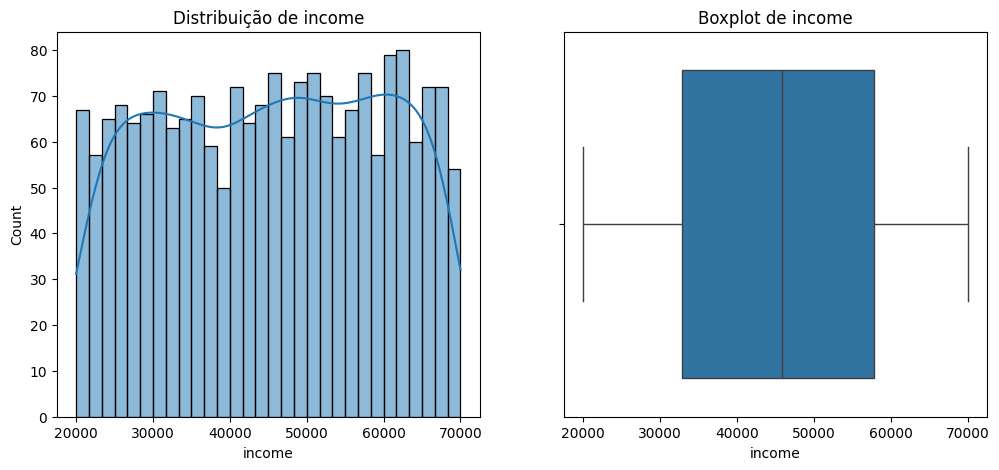

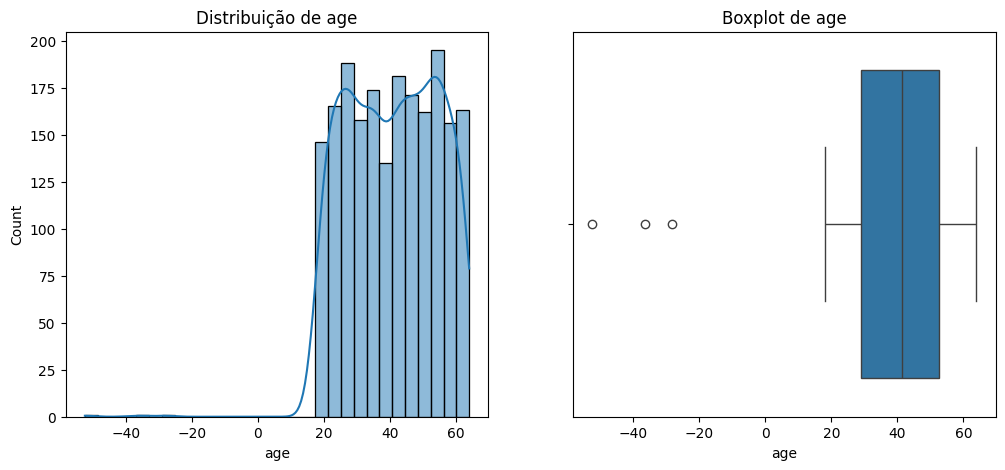

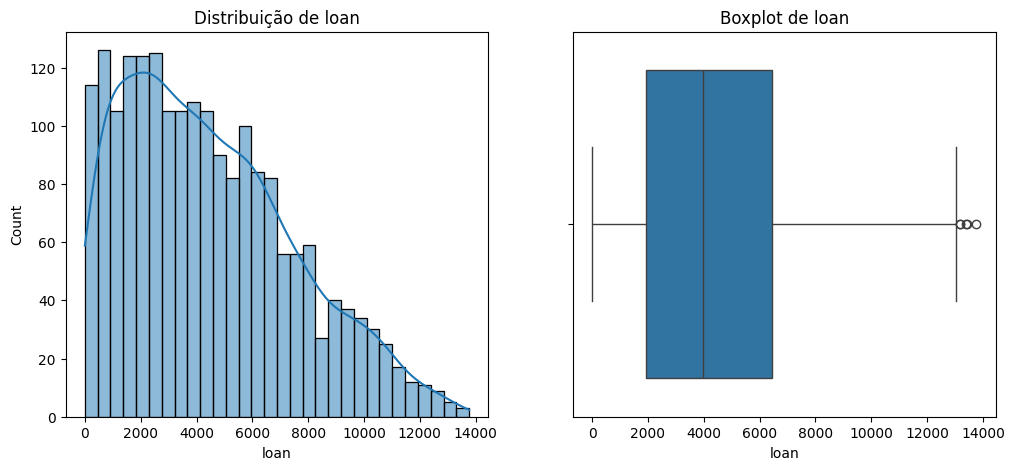

In [ ]:
for col in numericas:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(base_credito[col], bins=30, kde=True)
    plt.title(f"Distribuição de {col}")

    plt.subplot(1, 2, 2)
    sns.boxplot(x=base_credito[col])
    plt.title(f"Boxplot de {col}")

    plt.show()

# 3a)Utilize um mapa de calor (heatmap) para visualizar as correlações entre os atributos.


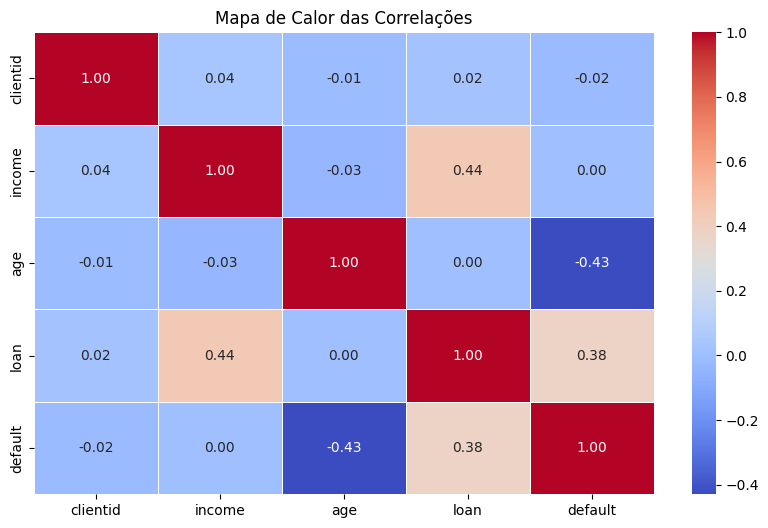

In [ ]:
# Calcular a matriz de correlação
correlacao = base_credito.corr()

# Criar o heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor das Correlações")
plt.show()

## 3b) Identifique quais variáveis têm maior impacto no risco de crédito.

In [ ]:
print("\nCorrelação com 'default':")
print(correlacao["default"].sort_values(ascending=False))


Correlação com 'default':
default     1.000000
loan        0.377160
income      0.002284
clientid   -0.020145
age        -0.429759
Name: default, dtype: float64


# 4)Distribuição de Clientes Aprovados e Negados

<ipython-input-44-48390229a4fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="negativado", data=base_credito, palette="coolwarm")


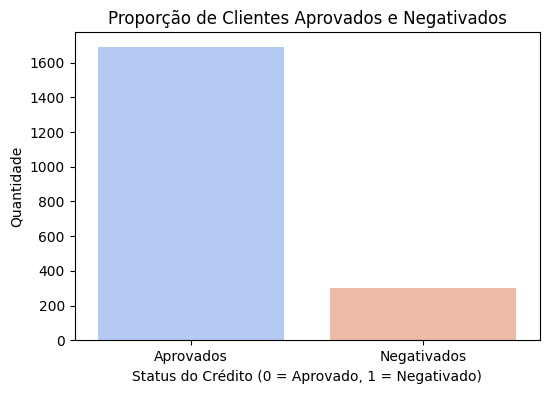


 Médias das variáveis por status do crédito:
                  income        age         loan
negativado                                      
0           49104.029062  40.931493  4745.406917
1           24260.156911  40.906533  2756.895183


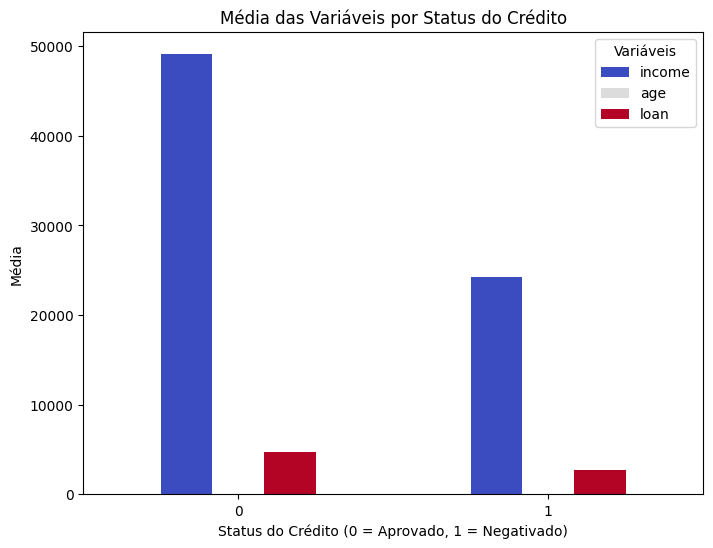

In [ ]:
# Criar a coluna com valores negativos
base_credito["negativado"] = (base_credito["loan"] > base_credito["income"] - 25000).astype(int)

# 1 Gráfico de barras - Proporção de aprovados e negativados
plt.figure(figsize=(6, 4))
sns.countplot(x="negativado", data=base_credito, palette="coolwarm")
plt.title("Proporção de Clientes Aprovados e Negativados")
plt.xlabel("Status do Crédito (0 = Aprovado, 1 = Negativado)")
plt.ylabel("Quantidade")
plt.xticks([0, 1], ["Aprovados", "Negativados"])
plt.show()

# 2 Comparação de fatores (renda, idade, empréstimo)
fatores = ["income", "age", "loan"]
estatisticas_por_status = base_credito.groupby("negativado")[fatores].mean()

print("\n Médias das variáveis por status do crédito:")
print(estatisticas_por_status)

# 3 ráfico de barras comparando a média das variáveis entre aprovados e negativados
estatisticas_por_status.plot(kind="bar", figsize=(8, 6), colormap="coolwarm")
plt.title("Média das Variáveis por Status do Crédito")
plt.xlabel("Status do Crédito (0 = Aprovado, 1 = Negativado)")
plt.ylabel("Média")
plt.legend(title="Variáveis")
plt.xticks(rotation=0)
plt.show()

# 5)Relação entre Idade e Aprovação de Crédito

<ipython-input-45-f36540130cca>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem_default.index, y=contagem_default.values, palette=['green', 'red'])


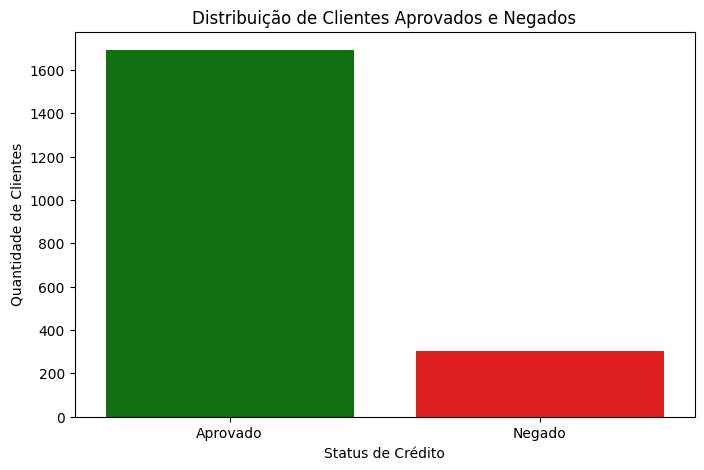

<ipython-input-45-f36540130cca>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='default', y='loan', data=base_credito, palette=['green', 'red'])


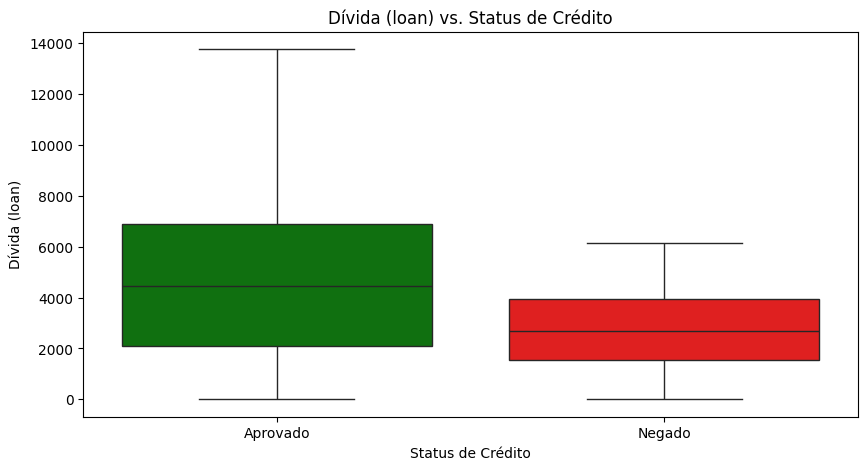

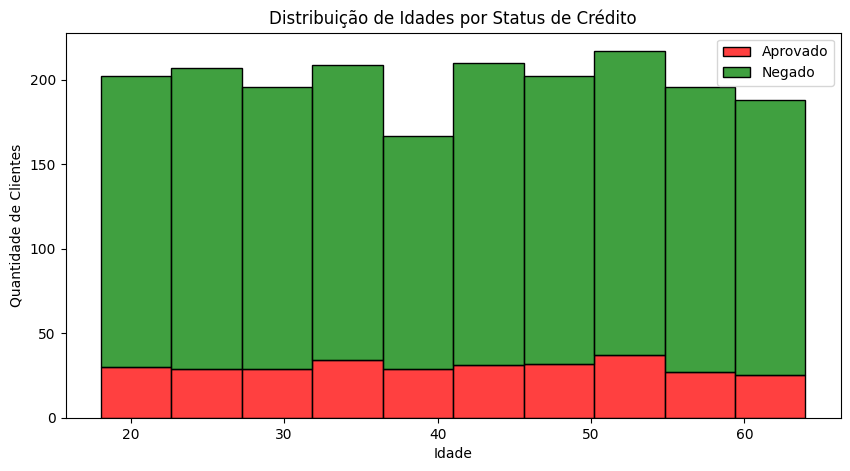

In [ ]:
# Criar o critério para negação de crédito
base_credito['default'] = (base_credito['loan'] >= base_credito['income']-25000 ).astype(int)

# Contagem de aprovados e negados
contagem_default = base_credito['default'].value_counts()

# Criar gráfico de barras para visualizar a proporção de aprovados e negados
plt.figure(figsize=(8,5))
sns.barplot(x=contagem_default.index, y=contagem_default.values, palette=['green', 'red'])
plt.xticks(ticks=[0,1], labels=['Aprovado', 'Negado'])
plt.xlabel('Status de Crédito')
plt.ylabel('Quantidade de Clientes')
plt.title('Distribuição de Clientes Aprovados e Negados')
plt.show()

# Gráfico de comparação entre salário e dívida
plt.figure(figsize=(10,5))
sns.boxplot(x='default', y='loan', data=base_credito, palette=['green', 'red'])
plt.xticks(ticks=[0,1], labels=['Aprovado', 'Negado'])
plt.xlabel('Status de Crédito')
plt.ylabel('Dívida (loan)')
plt.title('Dívida (loan) vs. Status de Crédito')
plt.show()

# Gráfico de comparação de idade entre aprovados e negados
plt.figure(figsize=(10,5))
sns.histplot(base_credito, x='age', hue='default', multiple='stack', bins=10, palette=['green', 'red'])
plt.xlabel('Idade')
plt.ylabel('Quantidade de Clientes')
plt.title('Distribuição de Idades por Status de Crédito')
plt.legend(labels=['Aprovado', 'Negado'])
plt.show()

# 5b)faixa de idade que tem mais dificuldade para encontrar crédito

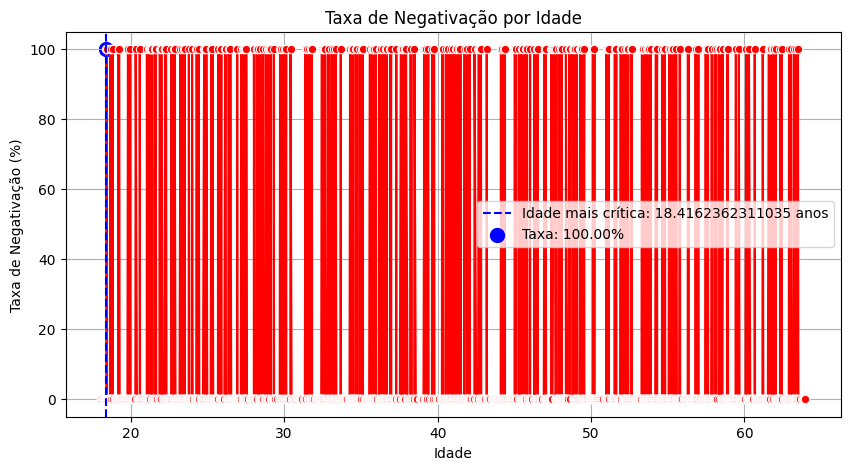

 A idade com maior dificuldade para obter crédito é 18.4162362311035 anos, com uma taxa de negativação de 100.00%.


In [ ]:
# Criar a coluna 'negativado' com a nova regra
base_credito["negativado"] = (base_credito["loan"] > base_credito["income"] -25000).astype(int)

# Calcular a taxa de negativação por idade
taxa_negativacao = base_credito.groupby("age")["negativado"].mean() * 100

# Encontrar a idade com maior taxa de negativação
idade_mais_critica = taxa_negativacao.idxmax()
maior_taxa = taxa_negativacao.max()

# Criar o gráfico de linha
plt.figure(figsize=(10, 5))
sns.lineplot(x=taxa_negativacao.index, y=taxa_negativacao.values, marker="o", color="red")

# Adicionar destaque na idade mais crítica
plt.axvline(x=idade_mais_critica, color="blue", linestyle="--", label=f"Idade mais crítica: {idade_mais_critica} anos")
plt.scatter(idade_mais_critica, maior_taxa, color="blue", s=100, label=f"Taxa: {maior_taxa:.2f}%")

# Configurar o gráfico
plt.title("Taxa de Negativação por Idade")
plt.xlabel("Idade")
plt.ylabel("Taxa de Negativação (%)")
plt.legend()
plt.grid()

# Exibir o gráfico
plt.show()

# Exibir a idade com maior dificuldade para obter crédito
print(f" A idade com maior dificuldade para obter crédito é {idade_mais_critica} anos, com uma taxa de negativação de {maior_taxa:.2f}%.")

# 5c) admitindo somente as idades maiores que 0, encontramos a faixa com maior dificuldade em obter crédito

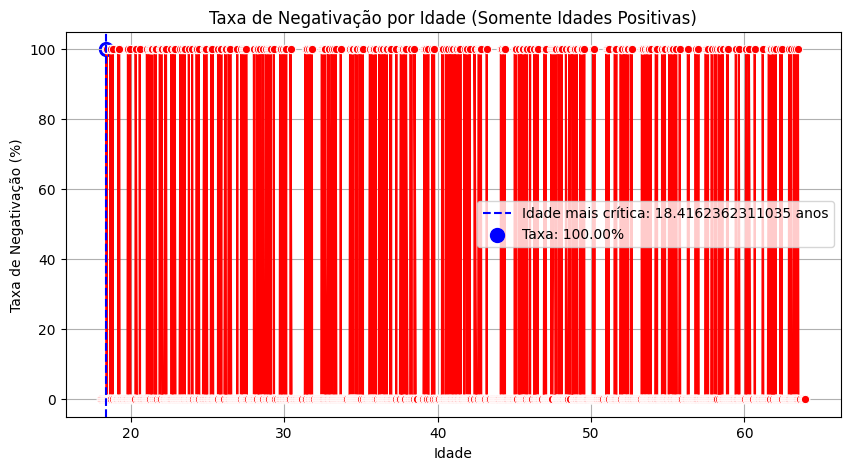

 A idade com maior dificuldade para obter crédito (considerando apenas idades positivas) é 18.4162362311035 anos, com uma taxa de negativação de 100.00%.


In [ ]:
# Filtrar apenas idades positivas
base_credito = base_credito[base_credito["age"] > 0]

# Criar a coluna 'negativado' com a nova regra
base_credito["negativado"] = (base_credito["loan"] > base_credito["income"] -25000).astype(int)

# Calcular a taxa de negativação por idade
taxa_negativacao = base_credito.groupby("age")["negativado"].mean() * 100

# Encontrar a idade com maior taxa de negativação
idade_mais_critica = taxa_negativacao.idxmax()
maior_taxa = taxa_negativacao.max()

# Criar o gráfico de linha
plt.figure(figsize=(10, 5))
sns.lineplot(x=taxa_negativacao.index, y=taxa_negativacao.values, marker="o", color="red")

# Adicionar destaque na idade mais crítica
plt.axvline(x=idade_mais_critica, color="blue", linestyle="--", label=f"Idade mais crítica: {idade_mais_critica} anos")
plt.scatter(idade_mais_critica, maior_taxa, color="blue", s=100, label=f"Taxa: {maior_taxa:.2f}%")

# Configurar o gráfico
plt.title("Taxa de Negativação por Idade (Somente Idades Positivas)")
plt.xlabel("Idade")
plt.ylabel("Taxa de Negativação (%)")
plt.legend()
plt.grid()

# Exibir o gráfico
plt.show()

# Exibir a idade com maior dificuldade para obter crédito
print(f" A idade com maior dificuldade para obter crédito (considerando apenas idades positivas) é {idade_mais_critica} anos, com uma taxa de negativação de {maior_taxa:.2f}%.")


# 5d) frequencia por idade de pessoas que tiveram default =1 para ter credito negado

<ipython-input-33-700bba6225e3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inadimplentes['faixa_etaria'] = pd.cut(inadimplentes['age'], bins=bins, labels=labels, right=False)


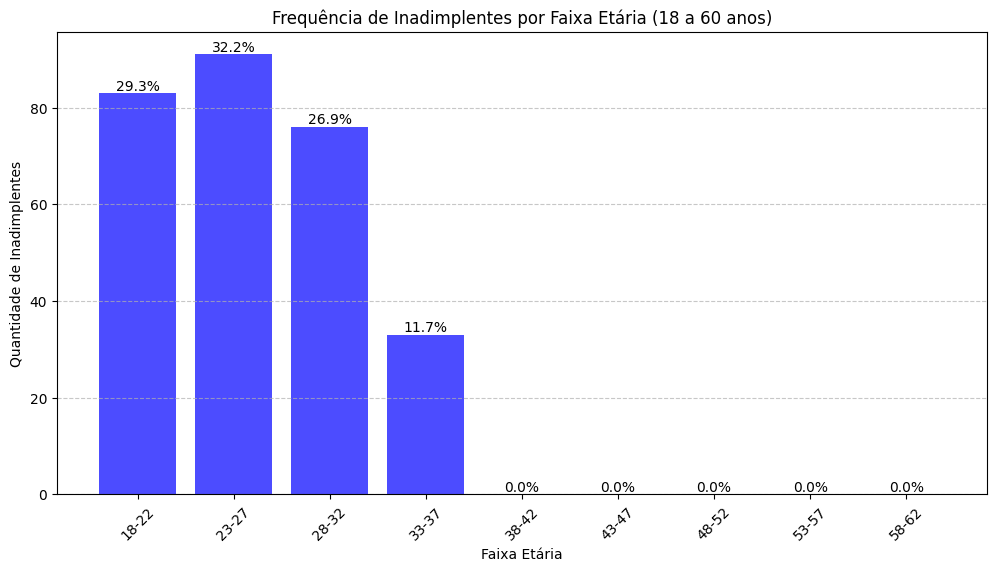

In [ ]:
# Filtrar apenas os inadimplentes (default == 1) e com idade entre 18 e 60 anos
inadimplentes = base_credito[(base_credito['default'] == 1) & (base_credito['age'].between(18, 60))]

# Criar faixas etárias de 5 em 5 anos
bins = list(range(18, 65, 5))  # De 18 até 60 anos (65 para incluir 60 no último intervalo)
labels = [f"{bins[i]}-{bins[i+1]-1}" for i in range(len(bins)-1)]

inadimplentes['faixa_etaria'] = pd.cut(inadimplentes['age'], bins=bins, labels=labels, right=False)

# Contar a quantidade de inadimplentes por faixa etária
frequencia_faixa = inadimplentes['faixa_etaria'].value_counts().sort_index()

# Calcular o percentual sobre o total de inadimplentes
percentual_faixa = (frequencia_faixa / frequencia_faixa.sum()) * 100

# Criar gráfico
plt.figure(figsize=(12,6))
bars = plt.bar(frequencia_faixa.index, frequencia_faixa.values, color='blue', alpha=0.7)

# Adicionar os valores percentuais acima das barras
for bar, percentual in zip(bars, percentual_faixa.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{percentual:.1f}%',
             ha='center', va='bottom', fontsize=10, color='black')

# Configurações do gráfico
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Inadimplentes')
plt.title('Frequência de Inadimplentes por Faixa Etária (18 a 60 anos)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 6) Impacto da Renda no Score de Crédito

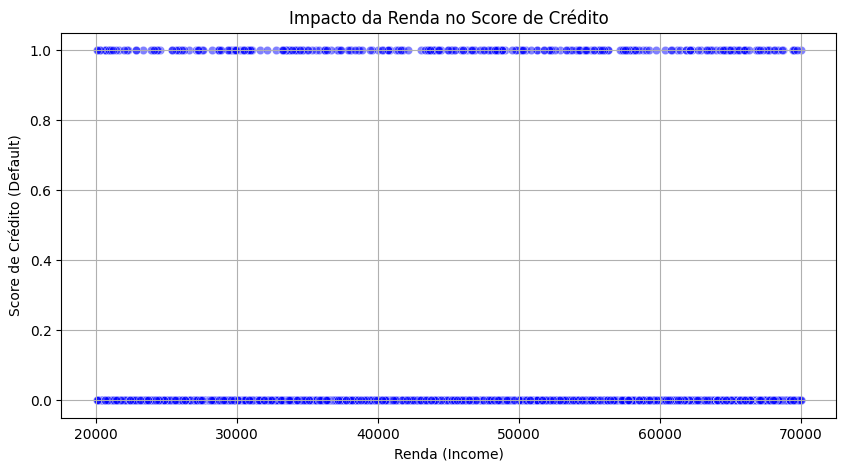

In [ ]:
# Filtrar valores inconsistentes (exemplo: rendas negativas)
base_credito = base_credito[base_credito["income"] > 0]

# Criar o scatter plot (gráfico de dispersão)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=base_credito["income"], y=base_credito["default"], alpha=0.5, color="blue")

# Adicionar título e rótulos
plt.title("Impacto da Renda no Score de Crédito")
plt.xlabel("Renda (Income)")
plt.ylabel("Score de Crédito (Default)")
plt.grid()

# Exibir o gráfico
plt.show()

# 6b) Verificar se há uma linha de tendencia

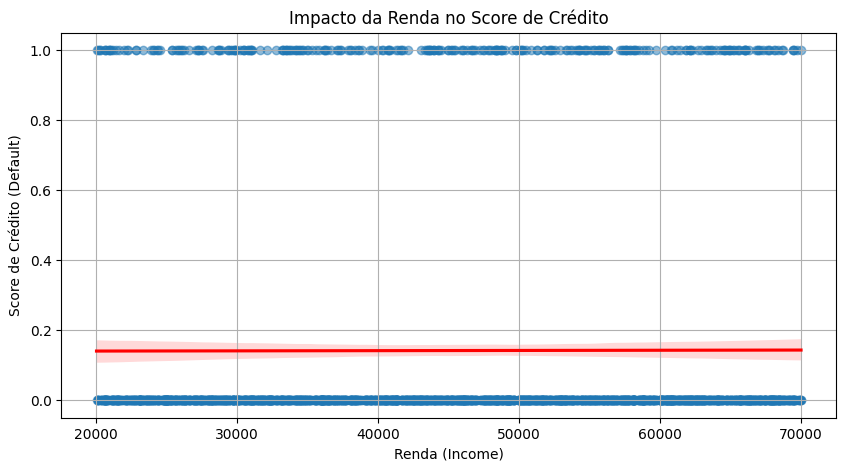

In [ ]:
# Filtrar valores inconsistentes
base_credito = base_credito[base_credito["income"] > 0]

# Criar scatter plot com linha de tendência
plt.figure(figsize=(10, 5))
sns.regplot(x=base_credito["income"], y=base_credito["default"], scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})

# Adicionar título e rótulos
plt.title("Impacto da Renda no Score de Crédito")
plt.xlabel("Renda (Income)")
plt.ylabel("Score de Crédito (Default)")
plt.grid()

# Exibir o gráfico
plt.show()

# 6c) Comentário
Distribuição Horizontal (Pouca Correlação)

Os pontos estão espalhados horizontalmente sem um padrão claro.
Há clientes tanto com baixa renda quanto alta renda em ambos os grupos (inadimplentes e adimplentes).
Isso sugere que a renda pode não ser um fator determinante para prever inadimplência.
Possível Explicação:

Se a renda fosse um fator decisivo, esperaríamos ver menos inadimplentes (1s) conforme a renda aumenta.
Como há inadimplentes em todas as faixas de renda, isso indica que outros fatores (ex: dívida e idade) podem influenciar mais no risco de crédito.

# 8)Tempo de Histórico de Crédito e Aprovação
R: Não é possivel responder por não haver um histórico ou dados suficientes para mostrar a variação da divida em função do passar do tempo;

# 9)Endividamento e Score de Crédito

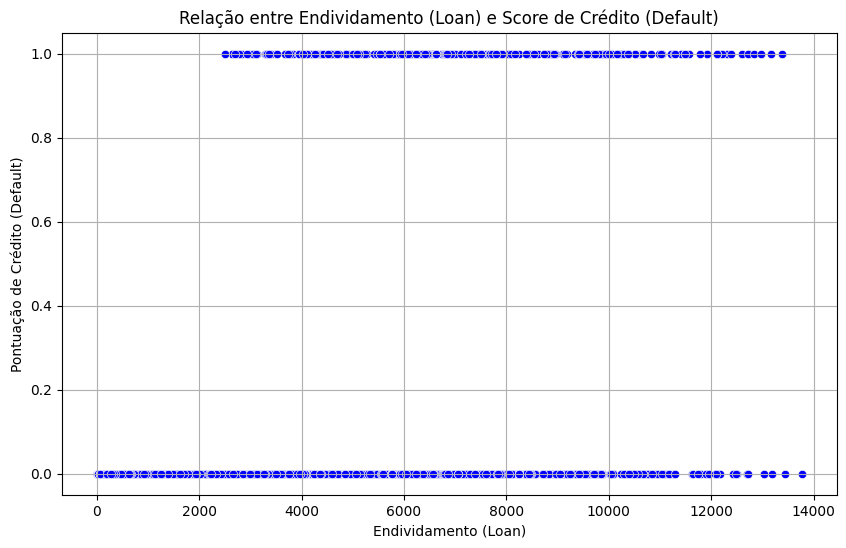

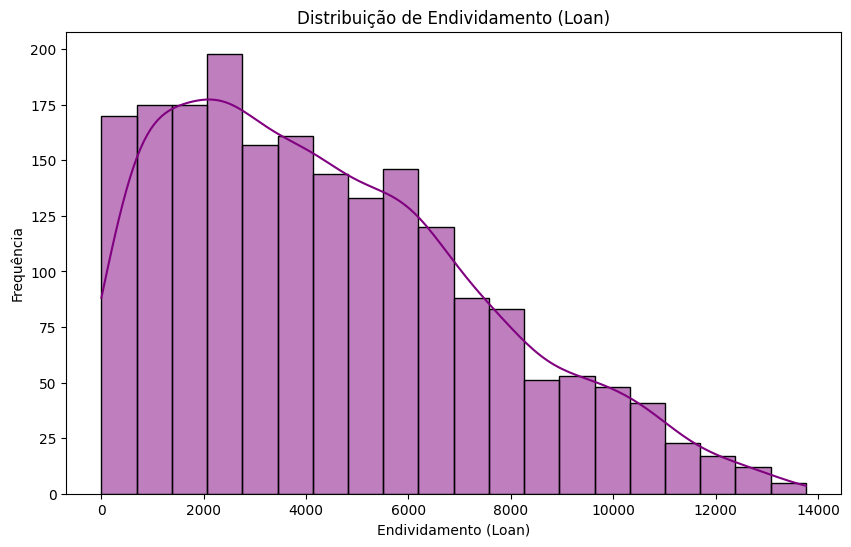

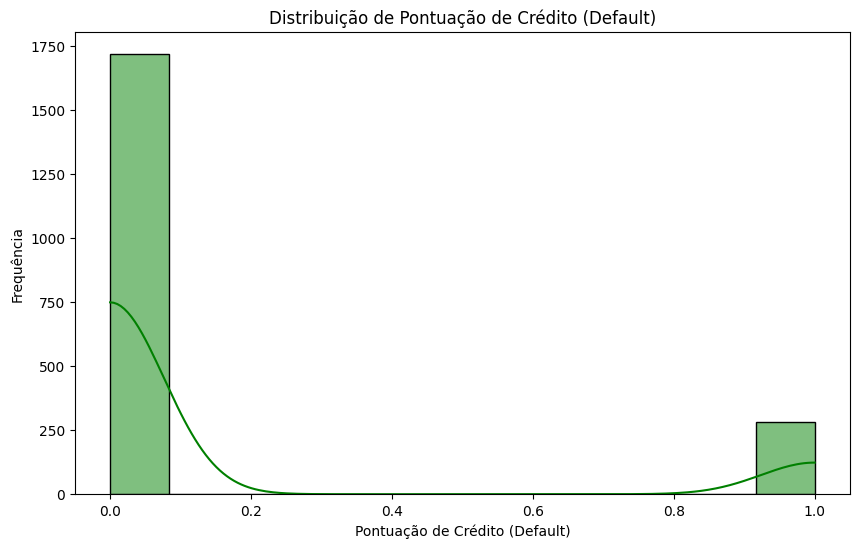

Correlação entre Endividamento e Score de Crédito:
            loan  default
loan     1.00000  0.37716
default  0.37716  1.00000


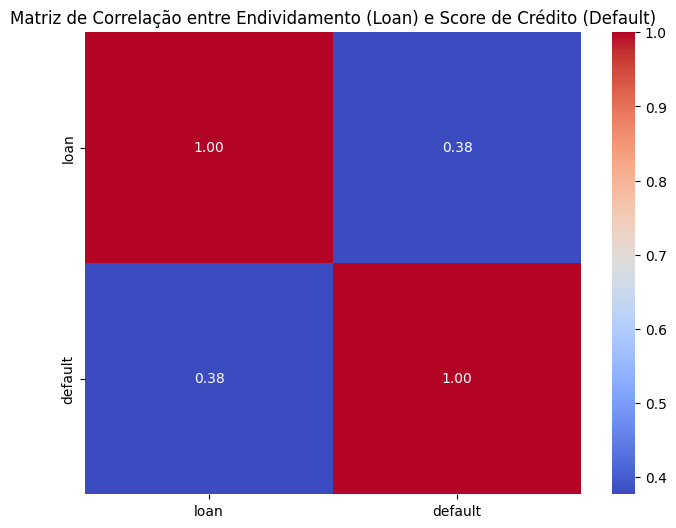

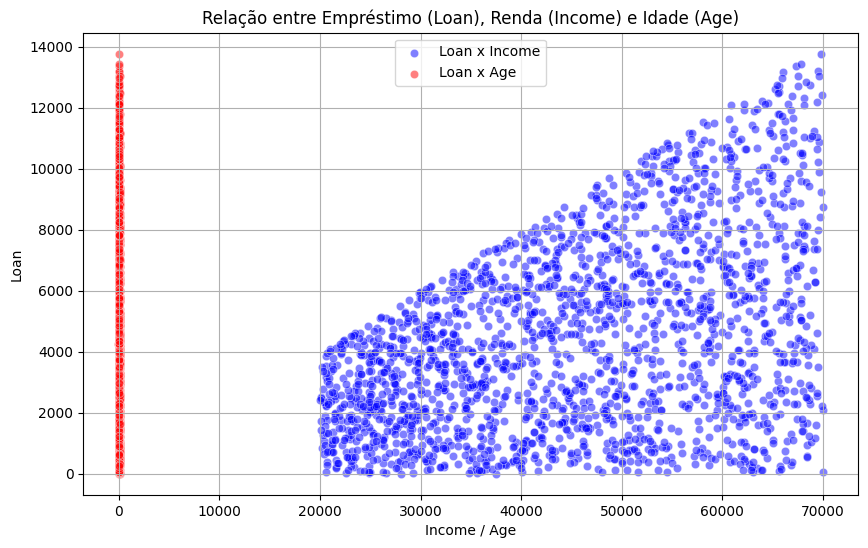

In [5]:
# Gráfico de dispersão (scatter plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=base_credito, x='loan', y='default', color='blue')
plt.title('Relação entre Endividamento (Loan) e Score de Crédito (Default)')
plt.xlabel('Endividamento (Loan)')
plt.ylabel('Pontuação de Crédito (Default)')
plt.grid(True)
plt.show()

# Histograma para a variável de endividamento (Loan)
plt.figure(figsize=(10, 6))
sns.histplot(base_credito['loan'], kde=True, color='purple')
plt.title('Distribuição de Endividamento (Loan)')
plt.xlabel('Endividamento (Loan)')
plt.ylabel('Frequência')
plt.show()

# Histograma para a variável de score de crédito (Default)
plt.figure(figsize=(10, 6))
sns.histplot(base_credito['default'], kde=True, color='green')
plt.title('Distribuição de Pontuação de Crédito (Default)')
plt.xlabel('Pontuação de Crédito (Default)')
plt.ylabel('Frequência')
plt.show()

# Cálculo da correlação entre o endividamento (loan) e o score de crédito (default)
correlacao = base_credito[['loan', 'default']].corr()
print('Correlação entre Endividamento e Score de Crédito:')
print(correlacao)

# Se quiser visualizar a matriz de correlação como um heatmap:
plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação entre Endividamento (Loan) e Score de Crédito (Default)')
plt.show()


# Criar a figura e os eixos
plt.figure(figsize=(10, 6))

# Plotar Loan x Income
sns.scatterplot(x=base_credito["income"], y=base_credito["loan"], color="blue", label="Loan x Income", alpha=0.5)

# Plotar Loan x Age
sns.scatterplot(x=base_credito["age"], y=base_credito["loan"], color="red", label="Loan x Age", alpha=0.5)

# Adicionar título e rótulos
plt.title("Relação entre Empréstimo (Loan), Renda (Income) e Idade (Age)")
plt.xlabel("Income / Age")
plt.ylabel("Loan")
plt.legend()
plt.grid()

# Exibir o gráfico
plt.show()

# 9b) Endividamento por faixa salarial

<ipython-input-30-93ec1af5c00e>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_endividamento = base_credito.groupby('faixa_renda')['loan'].mean()


faixa_renda
Baixa          2611.809264
Média-Baixa    3926.035420
Média-Alta     5235.968139
Alta           5999.702891
Name: loan, dtype: float64


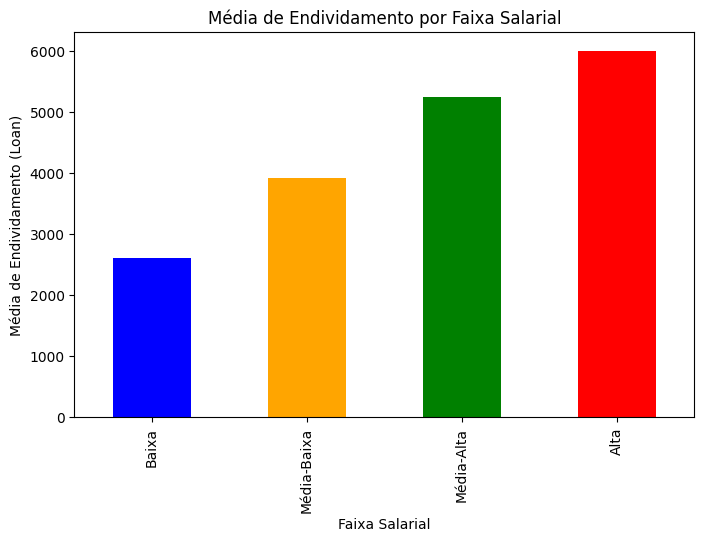

faixa_renda
Baixa          25.025075
Alta           25.025075
Média-Baixa    24.974925
Média-Alta     24.974925
Name: proportion, dtype: float64


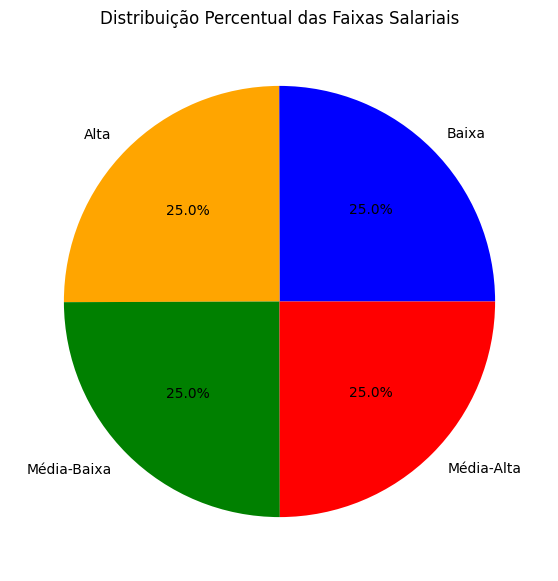

In [ ]:
# Criar faixas de renda
base_credito['faixa_renda'] = pd.qcut(base_credito['income'], q=4, labels=['Baixa', 'Média-Baixa', 'Média-Alta', 'Alta'])

# Calcular média de endividamento por faixa salarial
media_endividamento = base_credito.groupby('faixa_renda')['loan'].mean()

# Exibir resultado
print(media_endividamento)

# Plotar gráfico
plt.figure(figsize=(8,5))
media_endividamento.plot(kind='bar', color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Faixa Salarial')
plt.ylabel('Média de Endividamento (Loan)')
plt.title('Média de Endividamento por Faixa Salarial')
plt.show()

# Contar a quantidade de pessoas em cada faixa
distribuicao_faixa = base_credito['faixa_renda'].value_counts(normalize=True) * 100

# Exibir resultado
print(distribuicao_faixa)

# Criar um gráfico de pizza para visualizar
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
distribuicao_faixa.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'orange', 'green', 'red'])
plt.ylabel('')
plt.title('Distribuição Percentual das Faixas Salariais')
plt.show()

# 10)Conclusões e Recomendações para Modelagem

Com base nos insights obtidos, quais variáveis parecem mais relevantes para um modelo de aprendizado de máquina?
Há necessidade de engenharia de features ou tratamento de dados para melhorar a qualidade do modelo?

R: As variaveis mais importantes seriam Loan e Income, pois por mais que a idade(age) possa mostrar tendencia em determinados grupos, ter a proporção de o quanto o usuario ganha e o quanto deve é o principal para saber se ele terá condições de saldar as dividas.
Engenharia de Features:
Transformações de Variáveis:
o	Renda (income) pode ser transformada, por exemplo, calculando a relação entre a renda e o endividamento (rácio loan/income). Isso pode fornecer uma medida mais clara da capacidade de pagamento de um cliente.
o	Interações entre variáveis: Criar variáveis de interação pode ser útil. Por exemplo: A interação entre idade e renda pode indicar o histórico financeiro (pessoas mais velhas com maior renda podem ter um perfil diferente em relação a jovens com alta renda).
Idade e Endividamento: A interação entre a idade e o endividamento pode fornecer insights sobre clientes mais jovens com maior endividamento, que podem ter um risco mais alto.
Criação de Variáveis Categóricas:
o	Variáveis como idade podem ser convertidas em categorias (ex. faixa etária) para facilitar a interpretação do modelo e capturar comportamentos específicos de grupos etários.


##Análise de Anomalias

In [ ]:
np.unique(base_credito['default'], return_counts=True);

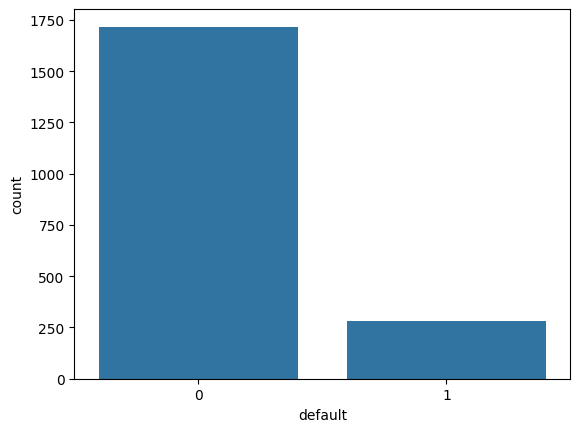

In [ ]:
sns.countplot(x = base_credito['default']);

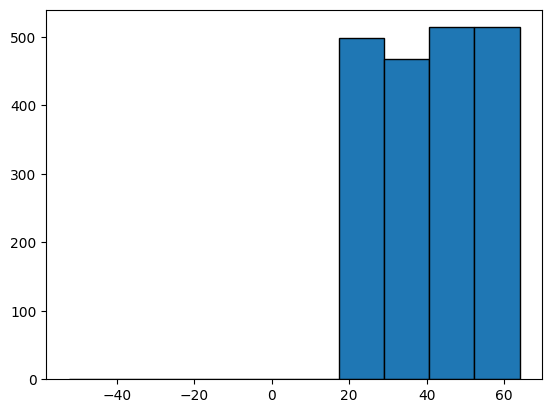

In [ ]:
plt.hist(x = base_credito['age'], edgecolor = 'black');

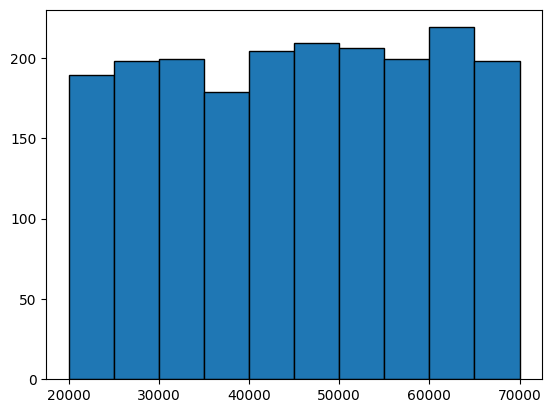

In [ ]:
plt.hist(x = base_credito['income'], edgecolor = 'black');

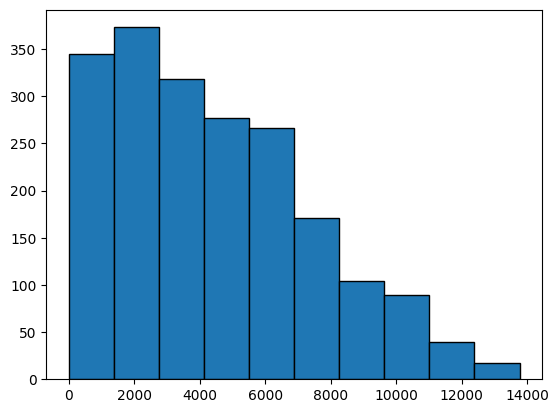

In [ ]:
plt.hist(x = base_credito['loan'], edgecolor = 'black');

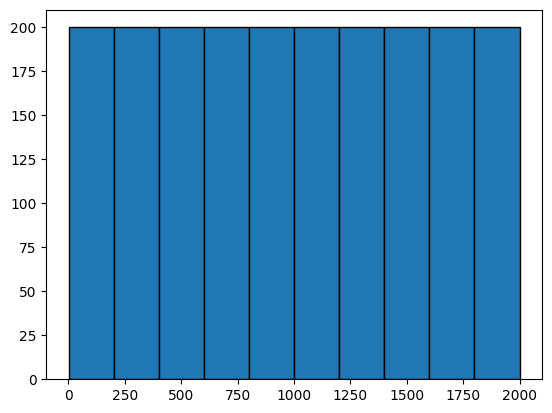

In [ ]:
plt.hist(x = base_credito['clientid'], edgecolor = 'black');

Observe as anomalias nos gráficos de "age", todos tem eixos de quadrante negativo.

In [ ]:
grafico = px.scatter_matrix(base_credito, dimensions=['age', 'income', 'loan'], color='default')
grafico.show()

Para verificar os tipos de dados das colunas das bases de dados

In [ ]:
print(base_credito.dtypes)

clientid        int64
income        float64
age           float64
loan          float64
default         int64
negativado      int64
dtype: object


#Tratamento das Anomalias

In [ ]:
base_credito.mean()

,0
clientid,1000.500000
income,45331.600018
age,40.807559
loan,4444.369695
default,0.141500


In [ ]:
base_credito['age'].mean()

40.80755937840458

In [ ]:
base_credito.loc[base_credito['age'] < 0,'age']= base_credito['age'].mean()

In [ ]:
base_credito.isnull()

,clientid,income,age,loan,default
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
1995,False,False,False,False,False
1996,False,False,False,False,False
1997,False,False,False,False,False
1998,False,False,False,False,False


In [ ]:
base_credito.isnull().sum()

,0
clientid,0
income,0
age,0
loan,0
default,0


In [ ]:
base_credito.loc[base_credito['age'] < 0]

,clientid,income,age,loan,default


In [ ]:
base_credito.loc[pd.isnull(base_credito['age'])]

,clientid,income,age,loan,default
28,29,59417.805406,NaN,2082.625938,0
30,31,48528.852796,NaN,6155.784670,0
31,32,23526.302555,NaN,2862.010139,0


In [ ]:
base_credito['age'].fillna(base_credito['age'].mean(), inplace=True)

<ipython-input-57-7950ef0b6b3a>:1: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





Para verificar os tipos de variaveis das colunas
